# ANN - Churn Prediction

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.metrics import Recall , Precision

In [2]:
tf.__version__

'2.20.0'

### Importing the dataset

In [3]:
dataset = pd.read_csv("Churn_Modelling.csv")
print(dataset.iloc[0,:])

RowNumber                  1
CustomerId          15634602
Surname             Hargrave
CreditScore              619
Geography             France
Gender                Female
Age                       42
Tenure                     2
Balance                  0.0
NumOfProducts              1
HasCrCard                  1
IsActiveMember             1
EstimatedSalary    101348.88
Exited                     1
Name: 0, dtype: object


In [4]:
X = dataset.iloc[:,3:-1].values
Y = dataset.iloc[:,-1].values

## Data Preprocessing

In [5]:
print(X[0,:])

[619 'France' 'Female' 42 2 0.0 1 1 1 101348.88]


In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [7]:
CT = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
LE = LabelEncoder()

In [8]:
X[:,2]=LE.fit_transform(X[:,2])
X = CT.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size = 0.2,random_state = 0)

In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xtrain = ss.fit_transform(Xtrain)
Xtest = ss.transform(Xtest)

In [11]:
Xtrain[0,:]

array([-1.01460667, -0.5698444 ,  1.74309049,  0.16958176, -1.09168714,
       -0.46460796,  0.00666099, -1.21571749,  0.8095029 ,  0.64259497,
       -1.03227043,  1.10643166])

## Building the ANN

### Initializing the ANN

In [12]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [13]:
ann.add(tf.keras.layers.Dense(units=6, activation = 'relu'))

### Adding the second hidden layer

In [14]:
ann.add(tf.keras.layers.Dense(units=6, activation = 'relu'))

### Adding the output layer

In [15]:
ann.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))

In [16]:
# we use sigmoid for binary classification and for non-binary classification we use softmax
# ann.add(tf.keras.layers.Dense(units=3, activation='softmax')) for 3 classes 

## Training the ANN

### Compiling the ANN

In [17]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy',Precision(name='precision'),Recall(name='recall')])

In [18]:
# we use binary_crossentropy for the binary classification and for non-binary classification we use categorical_crossentropy
# ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) for one hot encoded classes
# ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) for integer encoded classes

### Training the ANN on the Training set

In [19]:
ann.fit(Xtrain, Ytrain, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7659 - loss: 0.5264 - precision: 0.2844 - recall: 0.0974
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7960 - loss: 0.4586 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7962 - loss: 0.4452 - precision: 1.0000 - recall: 0.0012    
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8002 - loss: 0.4359 - precision: 0.8696 - recall: 0.0245
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8051 - loss: 0.4276 - precision: 0.7920 - recall: 0.0607
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8074 - loss: 0.4189 - precision: 0.7382 - recall: 0.0864
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8151 - loss: 0.4084 - precision: 0.7977 - recall: 0.1256
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8234 - loss: 0.3955 - precision: 0.7626 - recall: 0.1

## Predicting a single customer 

In [20]:
customer=np.array([[600,'France','Male',40,3,60000,2,1,1,50000]])
customer[:,2] = LE.transform(customer[:,2])
customer = CT.transform(customer)

In [21]:
customer = ss.transform(customer)

In [22]:
customerleave = ann.predict(customer)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


In [23]:
1 if customerleave > 0.5 else 0

0

In [24]:
Ypred = ann.predict(Xtest)
Ypred = (Ypred > 0.5).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [25]:
np.set_printoptions(threshold=np.inf)

In [26]:
print(np.concatenate((Ypred.reshape(len(Ypred),1),Ytest.reshape(len(Ytest),1)),1))

[[0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

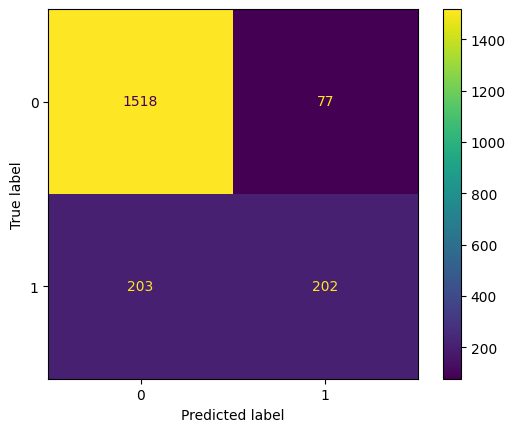

In [28]:
ConfusionMatrixDisplay.from_predictions(Ytest,Ypred)

In [29]:
print(f'accuracy_score : {accuracy_score(Ytest,Ypred)}')
print(classification_report(Ytest,Ypred))

accuracy_score : 0.86
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1595
           1       0.72      0.50      0.59       405

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000

